# Este Notebook presenta la solucion presentado por Carlos E. al reto 8 de la Maraton Behin the Code 2020 - IBM Latinoamerica

In [2]:
import warnings
warnings.filterwarnings("ignore")

# MARATÓN BEHIND THE CODE 2020

# DESAFÍO 8 - Digital House

El reto de Digital House tiene que ver con la misión y visión de la empresa; la cual busca transformar la vida de las personas, desarrollando competencias digitales, para que generen un impacto positivo en la sociedad. En ese sentido, Digital House busca a través de este desafío medir la empleabilidad de los cursos que disponibiliza en su plataforma, es decir que tan factible es que un alumno o egresado de Digital House acceda al mercado laboral o consiga un trabajo en su área luego de finalizar uno o varios de los cursos ofrecidos en la plataforma.

Entender que características o variables hacen que una persona sea más o menos empleable es fundamental para la empresa y para generar ese impacto positivo que busca aportar a la sociedad

<hr>

## Instalación de algunas bibliotecas de Python

In [3]:
!pip install scikit-learn --upgrade
!pip install scipy --upgrade

     |████████████████████████████████| 6.8MB 3.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 25.9MB 169kB/s 
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.5.2 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


### Importamos las librerias necesarias

In [3]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import module to calculate model perfomance metrics
import seaborn as sns
from sklearn import metrics

# Standard Scaler
from sklearn.preprocessing import StandardScaler

# import models
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Feature engineering
from sklearn.preprocessing import PolynomialFeatures

# import GridSearch
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<hr>

## Descargue el conjunto de datos del desafío en formato .csv

In [4]:
import pandas as pd

!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
df_training_dataset = pd.read_csv(r'train_dataset_digitalhouse.csv')
df_training_dataset.tail()

--2020-09-21 20:37:00--  https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 654532 (639K) [text/plain]
Saving to: ‘train_dataset_digitalhouse.csv’

train_dataset_digit 100%[===================>] 639.19K  --.-KB/s    in 0.1s    

2020-09-21 20:37:01 (6.51 MB/s) - ‘train_dataset_digitalhouse.csv’ saved [654532/654532]



,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
8990,9995,29.0,MASCULINO,ARGENTINA,TERTIARY,DEVELOPMENT,NaN,4.0,4701.6,9.1,86.0
8991,9996,34.0,NaN,ARGENTINA,UNIVERSITARY,ENGINEERING,PROGRAMACION,3.4,4646.2,16.8,95.0
8992,9997,28.0,FEMENINO,ARGENTINA,POST_GRADUATE,ENGINEERING,EJECUTIVO,NaN,3315.1,5.6,95.0
8993,9998,23.0,MASCULINO,MEXICO,TERTIARY,ENGINEERING,PROGRAMACION,3.3,4437.8,0.9,87.0
8994,9999,36.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,DATA,3.4,4600.8,19.6,88.0


## En el conjunto de datos proporcionado, tenemos las siguientes columnas:

* Unnamed: 0
* EDAD
* GENERO
* RESIDENCIA
* NV_ESTUDIO
* ESTUDIO_PREV
* TRACK_DH
* AVG_DH
* MINUTES_DH
* EXPERIENCIA
* **DIAS_EMP = El valor "target" que se va a predecir**

Podemos verificar fácilmente que faltan valores usando el siguiente código:

```df_training_dataset.info()```

Debe manejar cuidadosamente estos valores faltantes antes de crear un modelo de regresión.

In [5]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8995 non-null   int64  
 1   EDAD          7668 non-null   float64
 2   GENERO        7620 non-null   object 
 3   RESIDENCIA    7638 non-null   object 
 4   NV_ESTUDIO    7623 non-null   object 
 5   ESTUDIO_PREV  7665 non-null   object 
 6   TRACK_DH      7714 non-null   object 
 7   AVG_DH        7651 non-null   float64
 8   MINUTES_DH    7619 non-null   float64
 9   EXPERIENCIA   7618 non-null   float64
 10  DIAS_EMP      8995 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 773.1+ KB


<hr>

## PRE PROCESING DATA

Correlacion entre variables

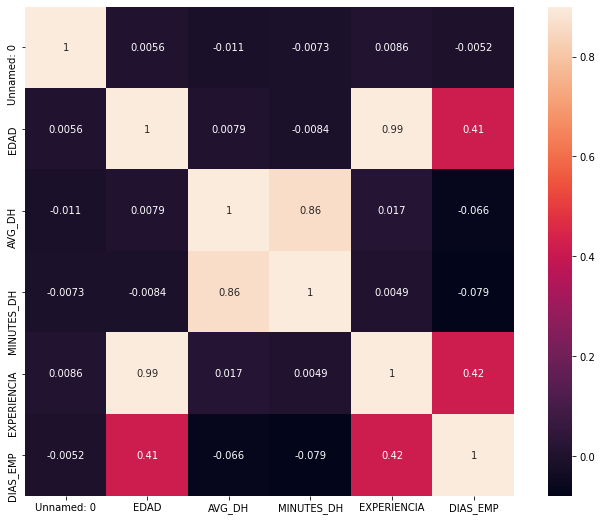

In [6]:
# Correlation map to see how features are correlated 
corrmat = df_training_dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,annot=True)

 Se observa que existe una gran correlacion entre los features EXPERIENCIA-EDAD, AVG_DH-MINUTES_DH 

### Removiendo columnas: se remueve la colinda Unnamed por ser id del alumno

In [7]:
df_training_dataset_1 = df_training_dataset.drop(columns=['Unnamed: 0'], inplace=False)
df_training_dataset_1.tail()

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
8990,29.0,MASCULINO,ARGENTINA,TERTIARY,DEVELOPMENT,NaN,4.0,4701.6,9.1,86.0
8991,34.0,NaN,ARGENTINA,UNIVERSITARY,ENGINEERING,PROGRAMACION,3.4,4646.2,16.8,95.0
8992,28.0,FEMENINO,ARGENTINA,POST_GRADUATE,ENGINEERING,EJECUTIVO,NaN,3315.1,5.6,95.0
8993,23.0,MASCULINO,MEXICO,TERTIARY,ENGINEERING,PROGRAMACION,3.3,4437.8,0.9,87.0
8994,36.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,DATA,3.4,4600.8,19.6,88.0


## MANEJANDO LOS DATOS NaN

### Visualizamos la relacion entre los features que tienen una correlcion mayor a 0.85

Relacion entre EDAD y EXPERIENCIA

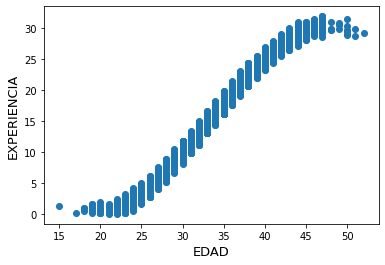

In [8]:
fig, ax = plt.subplots()
ax.scatter(x = df_training_dataset['EDAD'], y = df_training_dataset['EXPERIENCIA'])
plt.ylabel('EXPERIENCIA', fontsize=13)
plt.xlabel('EDAD', fontsize=13)
plt.show()

Relacion entre AVG_DH y MINUTES_DH

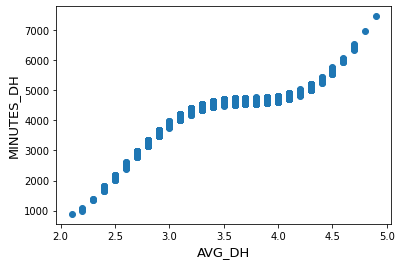

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = df_training_dataset['AVG_DH'], y = df_training_dataset['MINUTES_DH'])
plt.ylabel('MINUTES_DH', fontsize=13)
plt.xlabel('AVG_DH', fontsize=13)
plt.show()

### Llenando datos columna EXPERIENCIA

Nos basamos en la correlacion existente para rellenar datos NaN

In [10]:
# Eliminalos filas con valores NaN
df_training_dataset_2 = df_training_dataset_1[['EDAD', 'EXPERIENCIA']].dropna()
df_training_dataset_2.tail()

,EDAD,EXPERIENCIA
8990,29.0,9.1
8991,34.0,16.8
8992,28.0,5.6
8993,23.0,0.9
8994,36.0,19.6


Determinamos una funcion que relaciona EDAD y EXPERIENCIA

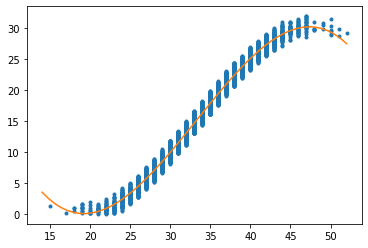

In [137]:
# Determinanos una funcion para la relacion entre EDAD y EXPERIENCIA
X= df_training_dataset_2['EDAD']
Y = df_training_dataset_2['EXPERIENCIA']
z = np.polyfit(X, Y, 3)
p = np.poly1d(z)

import matplotlib.pyplot as plt
xp = np.linspace(14, 52, 50)
plt.plot(X, Y, '.', xp, p(xp), '-')
plt.show()

Solo usaremos los valores que no tienen NaN en EDAD para llevar la columna EXPERIENCIA

In [12]:
## Subconjunto sin valores nan en la columna EDAD
df_training_dataset_3 = df_training_dataset_1[['EDAD', 'EXPERIENCIA']].dropna(subset=['EDAD'])
df_training_dataset_3.tail()

,EDAD,EXPERIENCIA
8990,29.0,9.1
8991,34.0,16.8
8992,28.0,5.6
8993,23.0,0.9
8994,36.0,19.6


Observamos la cantidad de nullos antes de llenar los valores

In [13]:
# Mostrando los datos nulos del dataset
print("Valores nulos del df_training_dataset antes de rellenar nan: \n\n{}\n".format(df_training_dataset_3.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de rellenar nan: 

EDAD              0
EXPERIENCIA    1186
dtype: int64



Obtenemos los indices de las filas con valor nan en la columna EXPERIENCIA

In [14]:
# Obtenemos los indices de las filas con valor nan en la columna EXPERIENCIA
indices_valores_nan_experiencia=np.array(df_training_dataset_3[df_training_dataset_3['EXPERIENCIA'].isna()].index)

Rellenamos los datos usando la funcion 

In [15]:
# Completamos los valores NaN en base al valor: EXPERIENCIA = funcion(EDAD)
for i in range(len(indices_valores_nan_experiencia)):
    df_training_dataset_1['EXPERIENCIA'][indices_valores_nan_experiencia[i]]=p(df_training_dataset_1['EDAD'].iloc[indices_valores_nan_experiencia[i]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Viualizamos la cantidad de valores nulos despues de llenar los datos

In [16]:
# Mostrando los datos nulos de EXPERIENCIA luego de completarlos
print("Valores nulos del df_training_dataset antes de rellenar nan: \n\n{}\n".format(df_training_dataset_1.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de rellenar nan: 

EDAD            1327
GENERO          1375
RESIDENCIA      1357
NV_ESTUDIO      1372
ESTUDIO_PREV    1330
TRACK_DH        1281
AVG_DH          1344
MINUTES_DH      1376
EXPERIENCIA      191
DIAS_EMP           0
dtype: int64



### Llenando datos columna MINUTES_DH

Similar proceso al anterior

In [17]:
# Eliminalos filas con valores NaN para determinar la funcion que relaciona  AVG_DH y MINUTES_DH
df_training_dataset_4 = df_training_dataset_1[['AVG_DH', 'MINUTES_DH']].dropna()
df_training_dataset_4.tail()

,AVG_DH,MINUTES_DH
8987,4.2,4847.4
8990,4.0,4701.6
8991,3.4,4646.2
8993,3.3,4437.8
8994,3.4,4600.8


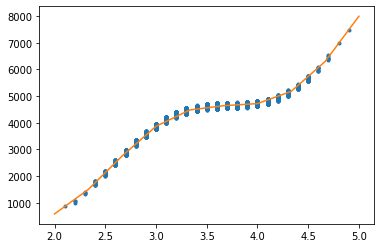

In [138]:
# Determinanos una funcion para la relacion entre AVG_DH y MINUTES_DH
X1= df_training_dataset_4['AVG_DH']
Y1 = df_training_dataset_4['MINUTES_DH']
z1 = np.polyfit(X1, Y1, 7)
p1 = np.poly1d(z1)

import matplotlib.pyplot as plt
xp1 = np.linspace(2, 5, 10)
plt.plot(X1, Y1, '.', xp1, p1(xp1), '-')
plt.show()

Solo usaremos los valores que no tienen NaN en AVG_DH para llevar la columna MINUTES_DH

In [19]:
# Subconjunto sin valores nan en la columna AVG_DH
df_training_dataset_5 = df_training_dataset_1[['AVG_DH', 'MINUTES_DH']].dropna(subset=['AVG_DH'])
df_training_dataset_5.tail()

,AVG_DH,MINUTES_DH
8989,3.4,NaN
8990,4.0,4701.6
8991,3.4,4646.2
8993,3.3,4437.8
8994,3.4,4600.8


Observamos la cantidad de nullos antes de llenar los valores

In [20]:
# Mostrando los datos nulos del dataset antes del proceso de completar
print("Valores nulos del df_training_dataset antes de rellenar nan: \n\n{}\n".format(df_training_dataset_5.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de rellenar nan: 

AVG_DH           0
MINUTES_DH    1188
dtype: int64



Obtenemos los indices de las filas con valor nan en la columna MINUTES_DH

In [21]:
# Obtenemos los indices de las filas con valor nan de MINUTES_DH
indices_valores_nan_minutes=np.array(df_training_dataset_5[df_training_dataset_5['MINUTES_DH'].isna()].index)

Rellenamos los datos usando la funcion

In [22]:
for i in range(len(indices_valores_nan_minutes)):
    df_training_dataset_1['MINUTES_DH'][indices_valores_nan_minutes[i]]=p1(df_training_dataset_1['AVG_DH'].iloc[indices_valores_nan_minutes[i]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Visualizamos la cantidad de valores nulos despues de llenar los datos

In [23]:
# Mostrando los datos nulos del dataset luego de completar valores
print("Valores nulos del df_training_dataset antes de rellenar nan: \n\n{}\n".format(df_training_dataset_1.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de rellenar nan: 

EDAD            1327
GENERO          1375
RESIDENCIA      1357
NV_ESTUDIO      1372
ESTUDIO_PREV    1330
TRACK_DH        1281
AVG_DH          1344
MINUTES_DH       188
EXPERIENCIA      191
DIAS_EMP           0
dtype: int64



### Llenando datos columna AVG_DH

Ahora se usara el valor mas cercano de MINUTES_DH (interpolar) para llenar los valores vacios de la columna AVG_DH

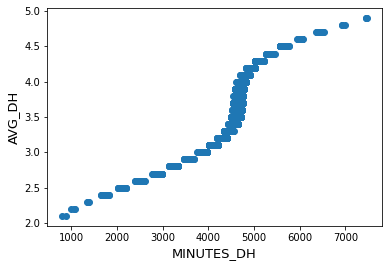

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = df_training_dataset_1['MINUTES_DH'], y = df_training_dataset_1['AVG_DH'])
plt.ylabel('AVG_DH', fontsize=13)
plt.xlabel('MINUTES_DH', fontsize=13)
plt.show()

Tomamos los valores no nullos de la columna MINUTES_DH y con ellos rellenaremos los valores de AVG_DH          

In [25]:
df_training_dataset_6=df_training_dataset_1.dropna(subset=['MINUTES_DH'])

Observamos la cantidad de nullos antes de llenar los valores

In [26]:
# Mostrando los datos nulos del dataset antes de completar los valores
print("Valores nulos del df_training_dataset antes de rellenar nan: \n\n{}\n".format(df_training_dataset_1.isna().sum(axis = 0)))

Valores nulos del df_training_dataset antes de rellenar nan: 

EDAD            1327
GENERO          1375
RESIDENCIA      1357
NV_ESTUDIO      1372
ESTUDIO_PREV    1330
TRACK_DH        1281
AVG_DH          1344
MINUTES_DH       188
EXPERIENCIA      191
DIAS_EMP           0
dtype: int64



Obtenemos los indices de las filas con valor nan en la columna AVG_DH

In [27]:
indices_nan=df_training_dataset_6[df_training_dataset_6['AVG_DH'].isna()].index

Rellenamos los datos usando interpolacion

In [28]:
for i in indices_nan:
  #print('i = ',i)
  for j in np.array(df_training_dataset_6.index):
    if df_training_dataset_6['MINUTES_DH'].loc[i].astype(int)==df_training_dataset_6['MINUTES_DH'].loc[j].astype(int) and i!=j :
        df_training_dataset_1['AVG_DH'].loc[i]= df_training_dataset_6['AVG_DH'].loc[j]
        break
      #print('j = ',j)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Visualizamos la cantidad de valores nulos despues de llenar los datos

In [29]:
# Mostrando los datos nulos del dataset despues de completar valores

print("Valores nulos del df_training_dataset antes de rellenar nan: \n\n{}\n".format(df_training_dataset_1.isna().sum(axis = 0)))

Valores nulos del df_training_dataset antes de rellenar nan: 

EDAD            1327
GENERO          1375
RESIDENCIA      1357
NV_ESTUDIO      1372
ESTUDIO_PREV    1330
TRACK_DH        1281
AVG_DH           457
MINUTES_DH       188
EXPERIENCIA      191
DIAS_EMP           0
dtype: int64



###  Llenando datos columna EDAD

Ahora se usara el valor mas cercano de EXPERIENCIA (interpolar) para llenar los valores vacios de la columna EDAD

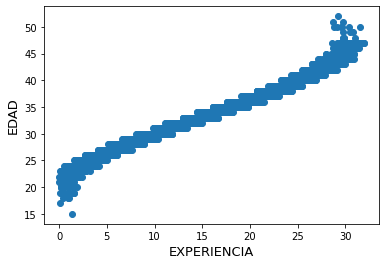

In [30]:
fig, ax = plt.subplots()
ax.scatter(x = df_training_dataset_2['EXPERIENCIA'], y = df_training_dataset_2['EDAD'])
plt.ylabel('EDAD', fontsize=13)
plt.xlabel('EXPERIENCIA', fontsize=13)
plt.show()

Tomamos los valores no nullos de la columna EXPERIENCIA y con ellos rellenaremos los valores de EDAD

In [31]:
df_training_dataset_7=df_training_dataset_1.dropna(subset=['EXPERIENCIA'])

Observamos la cantidad de nullos antes de llenar los valores

In [32]:
# Mostrando los datos nulos del dataset antes de la segunda transformación (df)
print("Valores nulos del df_training_dataset antes de rellenar nan: \n\n{}\n".format(df_training_dataset_7.isna().sum(axis = 0)))

Valores nulos del df_training_dataset antes de rellenar nan: 

EDAD            1136
GENERO          1342
RESIDENCIA      1332
NV_ESTUDIO      1343
ESTUDIO_PREV    1295
TRACK_DH        1242
AVG_DH           447
MINUTES_DH       183
EXPERIENCIA        0
DIAS_EMP           0
dtype: int64



Obtenemos los indices de las filas con valor nan en la columna EDAD

In [33]:
indices_nan=df_training_dataset_7[df_training_dataset_7['EDAD'].isna()].index

Rellenamos los datos usando interpolacion

In [34]:
for i in indices_nan:
  #print('i = ',i)
  for j in np.array(df_training_dataset_7.index):
    if df_training_dataset_7['EXPERIENCIA'].loc[i].astype(int)==df_training_dataset_7['EXPERIENCIA'].loc[j].astype(int) and i!=j :
        df_training_dataset_1['EDAD'].loc[i]= df_training_dataset_7['EDAD'].loc[j]
        break
      #print('j = ',j)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Visualizamos la cantidad de valores nulos despues de llenar los datos

In [35]:
# Mostrando los datos nulos del dataset antes de la segunda transformación (df)
print("Valores nulos del df_training_dataset antes de rellenar nan: \n\n{}\n".format(df_training_dataset_1.isna().sum(axis = 0)))

Valores nulos del df_training_dataset antes de rellenar nan: 

EDAD             250
GENERO          1375
RESIDENCIA      1357
NV_ESTUDIO      1372
ESTUDIO_PREV    1330
TRACK_DH        1281
AVG_DH           457
MINUTES_DH       188
EXPERIENCIA      191
DIAS_EMP           0
dtype: int64



## Dividimos en features y target

### Datos numericos

In [36]:
# FEATURES
X=df_training_dataset_1.drop('DIAS_EMP', axis = 1)
# TARGET
y=df_training_dataset_1.DIAS_EMP

Escalando la data numerica

In [37]:
# Seleccionamos columnas con datos numericos
Data_numerica = X.select_dtypes(exclude = 'object')
Data_numerica.columns = ['EDAD','AVG_DH','EXPERIENCIA','MINUTES_DH']

Rellenando nan por media 

In [38]:
Data_numerica['EDAD'].fillna((Data_numerica['EDAD'].mean()), inplace=True)
Data_numerica['AVG_DH'].fillna((Data_numerica['AVG_DH'].mean()), inplace=True)
Data_numerica['EXPERIENCIA'].fillna((Data_numerica['EXPERIENCIA'].mean()), inplace=True)
Data_numerica['MINUTES_DH'].fillna((Data_numerica['MINUTES_DH'].mean()), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [39]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
ss = StandardScaler()
X_train_numeric = pd.DataFrame(ss.fit_transform(Data_numerica))
X_train_numeric.set_index (Data_numerica.index, inplace = True)
X_train_numeric.columns = ['EDAD','AVG_DH','EXPERIENCIA','MINUTES_DH']
X_train_numeric.tail()

,EDAD,AVG_DH,EXPERIENCIA,MINUTES_DH
8990,-1.011513,1.275018e+00,0.537990,-0.992386
8991,-0.001870,-2.687088e-01,0.432168,0.101118
8992,-1.213441,-1.142588e-15,-2.110419,-1.489433
8993,-2.223084,-5.259967e-01,0.034095,-2.156897
8994,0.401987,-2.687088e-01,0.345448,0.498756


In [40]:
X_train_numeric.shape

(8995, 4)

### Encoding data categorica

In [41]:
X_train_cat = X.select_dtypes(include = 'object')

Completando nullos por moda

In [42]:
X_train_cat = X_train_cat.apply(lambda x:x.fillna(x.value_counts().index[0]))

Binarizamos la columna GENERO

In [43]:
from sklearn.preprocessing import LabelBinarizer
bin = LabelBinarizer()
X_train_cat.GENERO = bin.fit_transform(X_train_cat.GENERO)

One Hot Encoding  para el resto de columnas categoricas

In [44]:
X_train_cat = pd.get_dummies(X_train_cat, columns=['RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH'])
X_train_cat.tail()

,GENERO,RESIDENCIA_ARGENTINA,RESIDENCIA_BRAZIL,RESIDENCIA_MEXICO,NV_ESTUDIO_POST_GRADUATE,NV_ESTUDIO_TERTIARY,NV_ESTUDIO_UNIVERSITARY,ESTUDIO_PREV_BUSINESS,ESTUDIO_PREV_COMMERCIAL,ESTUDIO_PREV_DEVELOPMENT,ESTUDIO_PREV_ENGINEERING,ESTUDIO_PREV_MARKETING,TRACK_DH_DATA,TRACK_DH_EJECUTIVO,TRACK_DH_MARKETING,TRACK_DH_PROGRAMACION
8990,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
8991,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
8992,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
8993,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
8994,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [45]:
X_train_cat.shape

(8995, 16)

Generamos el DataFrame final

In [46]:
X_train_prep = pd.merge(X_train_numeric,X_train_cat , left_index = True, right_index = True)

In [47]:
X_train_prep.tail()

,EDAD,AVG_DH,EXPERIENCIA,MINUTES_DH,GENERO,RESIDENCIA_ARGENTINA,RESIDENCIA_BRAZIL,RESIDENCIA_MEXICO,NV_ESTUDIO_POST_GRADUATE,NV_ESTUDIO_TERTIARY,NV_ESTUDIO_UNIVERSITARY,ESTUDIO_PREV_BUSINESS,ESTUDIO_PREV_COMMERCIAL,ESTUDIO_PREV_DEVELOPMENT,ESTUDIO_PREV_ENGINEERING,ESTUDIO_PREV_MARKETING,TRACK_DH_DATA,TRACK_DH_EJECUTIVO,TRACK_DH_MARKETING,TRACK_DH_PROGRAMACION
8990,-1.011513,1.275018e+00,0.537990,-0.992386,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
8991,-0.001870,-2.687088e-01,0.432168,0.101118,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
8992,-1.213441,-1.142588e-15,-2.110419,-1.489433,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0
8993,-2.223084,-5.259967e-01,0.034095,-2.156897,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
8994,0.401987,-2.687088e-01,0.345448,0.498756,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [48]:
X_train_prep.shape

(8995, 20)

# Modelado y predicciones

### PRIMER SET DE ENTRENAMIENTO

In [49]:
X_train_prep.columns

Index(['EDAD', 'AVG_DH', 'EXPERIENCIA', 'MINUTES_DH', 'GENERO',
       'RESIDENCIA_ARGENTINA', 'RESIDENCIA_BRAZIL', 'RESIDENCIA_MEXICO',
       'NV_ESTUDIO_POST_GRADUATE', 'NV_ESTUDIO_TERTIARY',
       'NV_ESTUDIO_UNIVERSITARY', 'ESTUDIO_PREV_BUSINESS',
       'ESTUDIO_PREV_COMMERCIAL', 'ESTUDIO_PREV_DEVELOPMENT',
       'ESTUDIO_PREV_ENGINEERING', 'ESTUDIO_PREV_MARKETING', 'TRACK_DH_DATA',
       'TRACK_DH_EJECUTIVO', 'TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION'],
      dtype='object')

Separamos en conjunto de features y target

In [50]:
features = X_train_prep[
    [
     'EDAD', 'AVG_DH', 'EXPERIENCIA', 'MINUTES_DH', 'GENERO',
       'RESIDENCIA_ARGENTINA', 'RESIDENCIA_BRAZIL', 'RESIDENCIA_MEXICO',
       'NV_ESTUDIO_POST_GRADUATE', 'NV_ESTUDIO_TERTIARY',
       'NV_ESTUDIO_UNIVERSITARY', 'ESTUDIO_PREV_BUSINESS',
       'ESTUDIO_PREV_COMMERCIAL', 'ESTUDIO_PREV_DEVELOPMENT',
       'ESTUDIO_PREV_ENGINEERING', 'ESTUDIO_PREV_MARKETING', 'TRACK_DH_DATA',
       'TRACK_DH_EJECUTIVO', 'TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION'
    ]
]
target = df_training_dataset_1.DIAS_EMP  

Dividimos en porcentaje de 0.9 y 0.1 el train y test set respectivamente.

In [93]:
# Dividir X e Y en juegos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=87, test_size=0.1)

In [94]:
y_train.tail()

1926    90.0
5126    90.0
5371    95.0
143     89.0
8525    92.0
Name: DIAS_EMP, dtype: float64

Entrenando diferentes modelos de regresion

In [95]:
# Modelo LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Los coeficientes
print('\nCoeficientes:', linreg.coef_)


print("")
# hacer predicciones en el conjunto de entrenamiento
y_pred = linreg.predict(X_train)
# RESULTADOS TRAIN SET
print("RESULTADOS TRAIN SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_train, y_pred))


print("")
# hacer predicciones en el conjunto de prueba
y_pred = linreg.predict(X_test)
# RESULTADOS TEST SET
print("RESULTADOS TEST SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_test, y_pred))


Coeficientes: [ 1.25492809e+00  1.22912177e-01 -6.14182435e-01  1.11142964e+00
 -9.29997189e+00 -1.88568896e-03  3.32992750e-03 -1.44423854e-03
 -1.32498808e+00  1.95011070e+00 -6.25122627e-01  1.74803596e+00
 -1.37510314e+00 -7.25217566e-01 -2.10999754e+00  2.46228228e+00
  8.44343518e-02 -7.53850662e-02 -5.31014985e-02  4.40522129e-02]

RESULTADOS TRAIN SET
RMSE = 2.8111
Variance score = 0.7559

RESULTADOS TEST SET
RMSE = 2.3963
Variance score = 0.8134


In [96]:
# Modelo Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

# hacer predicciones en el conjunto de entrenamiento
y_pred = clf.predict(X_train)
# RESULTADOS TRAIN SET
print("RESULTADOS TRAIN SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_train, y_pred))


print("")
# hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)
# RESULTADOS TEST SET
print("RESULTADOS TEST SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_test, y_pred))

RESULTADOS TRAIN SET
RMSE = 2.8111
Variance score = 0.7559

RESULTADOS TEST SET
RMSE = 2.3964
Variance score = 0.8134


In [97]:
!pip install xgboost --upgrade

     |████████████████████████████████| 148.9MB 88kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [98]:
# Modelof XGB
xgb = XGBRegressor(random_state=2, colsample_bytree=0.85,
learning_rate= 0.04,
max_depth= 2,
min_child_weight = 5,
n_estimators=400,
subsample=0.85)

xgb.fit(X_train, y_train)

# hacer predicciones en el conjunto de entrenamiento
y_pred = xgb.predict(X_train)
# RESULTADOS TRAIN SET
print("RESULTADOS TRAIN SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_train, y_pred))


print("")
# hacer predicciones en el conjunto de prueba
y_pred = xgb.predict(X_test)
# RESULTADOS TEST SET
print("RESULTADOS TEST SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_test, y_pred))

[21:11:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RESULTADOS TRAIN SET
RMSE = 2.7128
Variance score = 0.7727

RESULTADOS TEST SET
RMSE = 2.3161
Variance score = 0.8257


In [99]:
# Modelof BaggingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

regr = BaggingRegressor(base_estimator=RandomForestRegressor(),n_estimators=10, random_state=0).fit(X_train, y_train)

# hacer predicciones en el conjunto de entrenamiento
y_pred = regr.predict(X_train)
# RESULTADOS TRAIN SET
print("RESULTADOS TRAIN SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_train, y_pred))


print("")
# hacer predicciones en el conjunto de prueba
y_pred = regr.predict(X_test)
# RESULTADOS TEST SET
print("RESULTADOS TEST SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_test, y_pred))

RESULTADOS TRAIN SET
RMSE = 1.7526
Variance score = 0.9051

RESULTADOS TEST SET
RMSE = 2.4523
Variance score = 0.8045


In [100]:
#Evaluation of various combinations of SGB

#Import the library
from sklearn.ensemble import GradientBoostingRegressor

#Add the n_estimators value to the below list if you want to run the algo
#n_list = np.array([ 60,70,80,90,150,500])
#Add the n_estimators value to the below list if you want to run the algo
n_list = np.array([ 125,128,130,135,150])

for n_estimators in n_list:
    #Set the base model
    model = GradientBoostingRegressor(n_estimators=n_estimators,random_state=1)
    model.fit(X_train, y_train)
    # hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    print('n_estimators = ', n_estimators)
    # calcular el RMSE de nuestras predicciones
    print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    # Explicación de la varianza: 1 es predicción perfecta
    print('Variance score = %.4f' % metrics.r2_score(y_test, y_pred))

n_estimators =  125
RMSE = 2.3154
Variance score = 0.8258
n_estimators =  128
RMSE = 2.3156
Variance score = 0.8257
n_estimators =  130
RMSE = 2.3149
Variance score = 0.8258
n_estimators =  135
RMSE = 2.3159
Variance score = 0.8257
n_estimators =  150
RMSE = 2.3173
Variance score = 0.8255


# Feature Engineering

### Creando nuevas features multiplicando features actuales

Creamos combinaciones de pares entre features

In [101]:
# Create every possible bivariate combination to be tested for feature engineering
from itertools import combinations

column_list = features.columns
interactions = list(combinations(column_list, 2))

In [102]:
# Iterate through interaction list to perform linear regression for each possible engineered features
interaction_dict = {}
for interaction in interactions:
    set_1 = features.copy()
    set_1['int'] = set_1[interaction[0]] * set_1[interaction[1]]
    lr3 = LinearRegression()
    lr3.fit(set_1, target)
    interaction_dict[lr3.score(set_1, target)] = interaction

mostramos el top 5 de los pares con mayor rendimiento

In [103]:
# Sort engineered features by best performers, top performers to be selected for final regression
top_5 = sorted(interaction_dict.keys(), reverse = True)[:5]
for interaction in top_5:
    print(interaction_dict[interaction])

('EDAD', 'MINUTES_DH')
('AVG_DH', 'EXPERIENCIA')
('RESIDENCIA_MEXICO', 'ESTUDIO_PREV_DEVELOPMENT')
('NV_ESTUDIO_POST_GRADUATE', 'ESTUDIO_PREV_COMMERCIAL')
('RESIDENCIA_ARGENTINA', 'ESTUDIO_PREV_DEVELOPMENT')


Seleccionamos los features que se generan a partir de features numericos

In [104]:
# Add the top two interaction features (which exclude a categorical variable) to existing DF for feature engineered model
features_1 = features.copy()
features_1['FEATURE1'] = features['EDAD'] * features['MINUTES_DH']
features_1['FEATURE2'] = features['AVG_DH'] * features['EXPERIENCIA']
features_1.head()

,EDAD,AVG_DH,EXPERIENCIA,MINUTES_DH,GENERO,RESIDENCIA_ARGENTINA,RESIDENCIA_BRAZIL,RESIDENCIA_MEXICO,NV_ESTUDIO_POST_GRADUATE,NV_ESTUDIO_TERTIARY,NV_ESTUDIO_UNIVERSITARY,ESTUDIO_PREV_BUSINESS,ESTUDIO_PREV_COMMERCIAL,ESTUDIO_PREV_DEVELOPMENT,ESTUDIO_PREV_ENGINEERING,ESTUDIO_PREV_MARKETING,TRACK_DH_DATA,TRACK_DH_EJECUTIVO,TRACK_DH_MARKETING,TRACK_DH_PROGRAMACION,FEATURE1,FEATURE2
0,0.603915,-1.040572,-0.550981,0.740179,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0.447005,0.573336
1,1.209701,-1.040572,-0.495778,1.294031,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1.565391,0.515893
2,0.200058,-1.040572,-0.634836,0.271534,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0.054323,0.660593
3,-0.203799,-1.040572,-0.719646,-0.353325,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0.072007,0.748844
4,-1.011513,0.245867,0.512012,-1.082706,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1.095171,0.125887


### SEGUNDO SET DE ENTRENAMIENTO

Creamos nuevos set de train y test con los nuevos features

In [105]:
# Dividir X e Y en juegos de entrenamiento y prueba
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features_1, target, random_state=87, test_size=0.1)

Modelamos y realizamos las predicciones con los diferentes modelos

In [106]:
# Modelo
linreg_1 = LinearRegression()
linreg_1.fit(X_train_1, y_train_1)

# Los coeficientes
print('\nCoeficientes:', linreg_1.coef_)

# hacer predicciones en el conjunto de entrenamiento
y_pred_1 = linreg_1.predict(X_train_1)
# RESULTADOS TRAIN SET
print("RESULTADOS TRAIN SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_1)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_train_1, y_pred_1))


print("")
# hacer predicciones en el conjunto de prueba
y_pred_1 = linreg_1.predict(X_test_1)
# RESULTADOS TEST SET
print("RESULTADOS TEST SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_1)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_test_1, y_pred_1))


Coeficientes: [ 1.04821785e+00  6.73412485e-02 -4.91579316e-01  1.33969308e+00
 -9.30800472e+00  1.87122651e-03  1.85444012e-02 -2.04156277e-02
 -1.34859523e+00  1.97096827e+00 -6.22373040e-01  1.77234349e+00
 -1.37699969e+00 -7.54762926e-01 -2.11606210e+00  2.47548123e+00
  8.17968566e-02 -5.29511325e-02 -7.28239243e-02  4.39782002e-02
  4.21232069e-01  6.67690078e-02]
RESULTADOS TRAIN SET
RMSE = 2.7609
Variance score = 0.7645

RESULTADOS TEST SET
RMSE = 2.3345
Variance score = 0.8229


In [107]:
from sklearn.linear_model import Ridge
clf1 = Ridge(alpha=1.0)
clf1.fit(X_train_1, y_train_1)

# hacer predicciones en el conjunto de entrenamiento
y_pred_1 = clf1.predict(X_train_1)
# RESULTADOS TRAIN SET
print("RESULTADOS TRAIN SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_1)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_train_1, y_pred_1))


print("")
# hacer predicciones en el conjunto de prueba
y_pred_1 = clf1.predict(X_test_1)
# RESULTADOS TEST SET
print("RESULTADOS TEST SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_1)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_test_1, y_pred_1))

RESULTADOS TRAIN SET
RMSE = 2.7609
Variance score = 0.7645

RESULTADOS TEST SET
RMSE = 2.3346
Variance score = 0.8229


In [108]:
#Import the library
from xgboost import XGBRegressor
xgb1 = XGBRegressor(random_state=2, colsample_bytree=0.7,
learning_rate= 0.04,
max_depth= 3,
min_child_weight = 4,
n_estimators=300,
silent=1,
subsample=0.8)

xgb1.fit(X_train_1, y_train_1)

# hacer predicciones en el conjunto de entrenamiento
y_pred_1 = xgb1.predict(X_train_1)
# RESULTADOS TRAIN SET
print("RESULTADOS TRAIN SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_1)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_train_1, y_pred_1))


print("")
# hacer predicciones en el conjunto de prueba
y_pred_1 = xgb1.predict(X_test_1)
# RESULTADOS TEST SET
print("RESULTADOS TEST SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_1)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_test_1, y_pred_1))

RESULTADOS TRAIN SET
RMSE = 2.6819
Variance score = 0.7778

RESULTADOS TEST SET
RMSE = 2.3155
Variance score = 0.8257


In [109]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

regr_1 = BaggingRegressor(base_estimator=RandomForestRegressor(),n_estimators=50, random_state=0).fit(X_train_1, y_train_1)

# hacer predicciones en el conjunto de entrenamiento
y_pred_1 = regr_1.predict(X_train_1)
# RESULTADOS TRAIN SET
print("RESULTADOS TRAIN SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_1)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_train_1, y_pred_1))


print("")
# hacer predicciones en el conjunto de prueba
y_pred_1 = regr_1.predict(X_test_1)
# RESULTADOS TEST SET
print("RESULTADOS TEST SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_1)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_test_1, y_pred_1))

RESULTADOS TRAIN SET
RMSE = 1.7274
Variance score = 0.9078

RESULTADOS TEST SET
RMSE = 2.4389
Variance score = 0.8067


In [110]:
#Evaluation of various combinations of SGB

#Import the library
from sklearn.ensemble import GradientBoostingRegressor

#Add the n_estimators value to the below list if you want to run the algo
#n_list = np.array([ 60,70,80,90,150,500])
#Add the n_estimators value to the below list if you want to run the algo
n_list = np.array([ 125,128,130,135,150])

for n_estimators in n_list:
    #Set the base model
    model = GradientBoostingRegressor(n_estimators=n_estimators,random_state=1)
    model.fit(X_train_1, y_train_1)
    # hacer predicciones en el conjunto de prueba
    y_pred_1 = model.predict(X_test_1)
    print('n_estimators = ', n_estimators)
    # calcular el RMSE de nuestras predicciones
    print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_1)))
    # Explicación de la varianza: 1 es predicción perfecta
    print('Variance score = %.4f' % metrics.r2_score(y_test_1, y_pred_1))

n_estimators =  125
RMSE = 2.3159
Variance score = 0.8257
n_estimators =  128
RMSE = 2.3159
Variance score = 0.8257
n_estimators =  130
RMSE = 2.3152
Variance score = 0.8258
n_estimators =  135
RMSE = 2.3140
Variance score = 0.8260
n_estimators =  150
RMSE = 2.3154
Variance score = 0.8258


Generando features polinomicos

In [111]:
set_2 = features_1.copy()

In [121]:
from sklearn.preprocessing import PolynomialFeatures

poly_dict = {}
for feature in features_1.columns:
    for p in range(2, 10):
        X_train_poly = set_2.copy()
        X_train_poly['sq'] = X_train_poly[feature] ** p
        lr = LinearRegression()
        lr.fit(X_train_poly, target)
        poly_dict[lr.score(X_train_poly, target)] = [feature, p]
    
poly_dict[max(poly_dict.keys())]

['MINUTES_DH', 3]

In [118]:
# Add the top two interaction features (which exclude a categorical variable) to existing DF for feature engineered model
features_2 = features_1.copy()
features_2['FEATURE3'] = features_2['EDAD'] * features_2['EDAD']* features_2['EDAD']
#X_train_prep_int['FEATURE3'] = X_train_prep_int['EDAD'] * X_train_prep_int['EDAD']* X_train_prep_int['EDAD']
features_2['FEATURE4'] = features_2['MINUTES_DH'] * features_2['MINUTES_DH'] 
features_2.head()

,EDAD,AVG_DH,EXPERIENCIA,MINUTES_DH,GENERO,RESIDENCIA_ARGENTINA,RESIDENCIA_BRAZIL,RESIDENCIA_MEXICO,NV_ESTUDIO_POST_GRADUATE,NV_ESTUDIO_TERTIARY,NV_ESTUDIO_UNIVERSITARY,ESTUDIO_PREV_BUSINESS,ESTUDIO_PREV_COMMERCIAL,ESTUDIO_PREV_DEVELOPMENT,ESTUDIO_PREV_ENGINEERING,ESTUDIO_PREV_MARKETING,TRACK_DH_DATA,TRACK_DH_EJECUTIVO,TRACK_DH_MARKETING,TRACK_DH_PROGRAMACION,FEATURE1,FEATURE2,FEATURE3,FEATURE4
0,0.603915,-1.040572,-0.550981,0.740179,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0.447005,0.573336,0.220256,0.547865
1,1.209701,-1.040572,-0.495778,1.294031,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1.565391,0.515893,1.770246,1.674517
2,0.200058,-1.040572,-0.634836,0.271534,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0.054323,0.660593,0.008007,0.073731
3,-0.203799,-1.040572,-0.719646,-0.353325,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0.072007,0.748844,-0.008465,0.124839
4,-1.011513,0.245867,0.512012,-1.082706,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1.095171,0.125887,-1.034937,1.172252


### TERCER SET DE ENTRENAMIENTO

In [119]:
# Dividir X e Y en juegos de entrenamiento y prueba
X_train_2, X_test_2, y_train_2, y_test_2= train_test_split(features_2, target, random_state=87, test_size=0.1)

In [127]:
# Modelo
linreg_2 = LinearRegression()
linreg_2.fit(X_train_2, y_train_2)

# Los coeficientes
print('\nCoeficientes:', linreg.coef_)

# hacer predicciones en el conjunto de entrenamiento
y_pred_2 = linreg_2.predict(X_train_2)
# RESULTADOS TRAIN SET
print("RESULTADOS TRAIN SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_train_2, y_pred_2)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_train_2, y_pred_2))


print("")
# hacer predicciones en el conjunto de prueba
y_pred_2 = linreg_2.predict(X_test_2)
# RESULTADOS TEST SET
print("RESULTADOS TEST SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_test_2, y_pred_2))


Coeficientes: [ 2.04908479e+00  7.16900512e-02 -4.93985996e-01  6.52524347e-01
 -9.31009993e+00 -1.27364101e-03  1.83741128e-02 -1.71004718e-02
 -1.34697809e+00  1.96347474e+00 -6.16496650e-01  1.78634863e+00
 -1.37974041e+00 -7.70460803e-01 -2.11631440e+00  2.48016698e+00
  8.97008052e-02 -4.94624331e-02 -7.58048024e-02  3.55664302e-02
  2.10989155e-01  6.51998796e-02 -1.06418749e-01  2.12191571e-01]
RESULTADOS TRAIN SET
RMSE = 2.7511
Variance score = 0.7662

RESULTADOS TEST SET
RMSE = 2.3183
Variance score = 0.8253


In [128]:
from sklearn.linear_model import Ridge
clf2 = Ridge(alpha=1.0)
clf2.fit(X_train_2, y_train_2)


# hacer predicciones en el conjunto de entrenamiento
y_pred_2 = clf2.predict(X_train_2)
# RESULTADOS TRAIN SET
print("RESULTADOS TRAIN SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_train_2, y_pred_2)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_train_2, y_pred_2))


print("")
# hacer predicciones en el conjunto de prueba
y_pred_2 = clf2.predict(X_test_2)
# RESULTADOS TEST SET
print("RESULTADOS TEST SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_test_2, y_pred_2))

RESULTADOS TRAIN SET
RMSE = 2.7511
Variance score = 0.7662

RESULTADOS TEST SET
RMSE = 2.3185
Variance score = 0.8253


In [129]:
#Import the library
from xgboost import XGBRegressor
xgb2 = XGBRegressor(random_state=2, colsample_bytree=0.7,
learning_rate= 0.04,
max_depth= 3,
min_child_weight = 4,
n_estimators=300,
silent=1,
subsample=0.8)

xgb2.fit(X_train_2, y_train_2)
# hacer predicciones en el conjunto de entrenamiento
y_pred_2 = xgb2.predict(X_train_2)
# RESULTADOS TRAIN SET
print("RESULTADOS TRAIN SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_train_2, y_pred_2)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_train_2, y_pred_2))


print("")
# hacer predicciones en el conjunto de prueba
y_pred_2 = xgb2.predict(X_test_2)
# RESULTADOS TEST SET
print("RESULTADOS TEST SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_test_2, y_pred_2))

RESULTADOS TRAIN SET
RMSE = 2.6766
Variance score = 0.7787

RESULTADOS TEST SET
RMSE = 2.3104
Variance score = 0.8265


In [130]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

regr_2 = BaggingRegressor(base_estimator=RandomForestRegressor(),n_estimators=10, random_state=87).fit(X_train_2, y_train_2)


y_pred_2 = regr_2.predict(X_train_2)
# RESULTADOS TRAIN SET
print("RESULTADOS TRAIN SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_train_2, y_pred_2)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_train_2, y_pred_2))


print("")
# hacer predicciones en el conjunto de prueba
y_pred_2 = regr_2.predict(X_test_2)
# RESULTADOS TEST SET
print("RESULTADOS TEST SET")
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_test_2, y_pred_2))

RESULTADOS TRAIN SET
RMSE = 1.7468
Variance score = 0.9057

RESULTADOS TEST SET
RMSE = 2.4364
Variance score = 0.8071


In [131]:
#Evaluation of various combinations of SGB

#Import the library
from sklearn.ensemble import GradientBoostingRegressor

#Add the n_estimators value to the below list if you want to run the algo
#n_list = np.array([ 60,70,80,90,150,500])
#Add the n_estimators value to the below list if you want to run the algo
n_list = np.array([ 150,200,250,300,500])

for n_estimators in n_list:
    #Set the base model
    model = GradientBoostingRegressor(n_estimators=n_estimators,random_state=1)
    model.fit(X_train_2, y_train_2)
    # hacer predicciones en el conjunto de prueba
    y_pred_2 = model.predict(X_test_2)
    print('n_estimators = ', n_estimators)
    # calcular el RMSE de nuestras predicciones
    print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))
    # Explicación de la varianza: 1 es predicción perfecta
    print('Variance score = %.4f' % metrics.r2_score(y_test_2, y_pred_2))

n_estimators =  150
RMSE = 2.3090
Variance score = 0.8267
n_estimators =  200
RMSE = 2.3152
Variance score = 0.8258
n_estimators =  250
RMSE = 2.3239
Variance score = 0.8245
n_estimators =  300
RMSE = 2.3320
Variance score = 0.8232
n_estimators =  500
RMSE = 2.3545
Variance score = 0.8198


### Se concluye que el tercer set da mejor RMSE y Variance score con XGBOOST

Realizamos tuning a XGBOOST REGRESSOR

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor(tree_method='gpu_hist')

parameters = {'random_state':[2],
              'learning_rate': [0.04,0.01,0.05,0.02], 
              'max_depth': [2,3,4,5],
              'min_child_weight': [2,3,4,5],
              'subsample': [0.4,0.6,0.8,0.85],
              'colsample_bytree': [0.6, 0.7,0.8,0.85],
              'n_estimators': [150,300,400,500]}

xgb_grid = GridSearchCV(xgb,
                    parameters,
                    scoring='neg_mean_squared_error', #this line can be commented to use XGB's default metric
                    cv = 5,
                    n_jobs = -1,
                    verbose=True)

In [ ]:
xgb_grid.fit(X_train_2, y_train_2)
xgb_grid.best_params_

Probramos con best params

In [196]:
#Evaluation of various combinations of XGB

#Import the library
from xgboost import XGBRegressor
xgb = XGBRegressor(
random_state=2, 
colsample_bytree=0.85,
learning_rate= 0.04,
max_depth= 2,
min_child_weight = 5,
n_estimators=400,
subsample=0.85)

xgb.fit(X_train_2, y_train_2)
y_pred_2 = xgb.predict(X_test_2)
# calcular el RMSE de nuestras predicciones
print('RMSE = %.4f' % np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))
# Explicación de la varianza: 1 es predicción perfecta
print('Variance score = %.4f' % metrics.r2_score(y_test_2, y_pred_2))

[21:35:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE = 2.3090
Variance score = 0.8267


# Una vez que tengamos el preprocesamiento, feature engineering y el modelo definido se procede a realizar predicciones sobre el set de prueba.

<hr>

## Completar los datos necesarios para entregar la solución

### Como entrega de su solución, esperamos los resultados numéricos predichos por su modelo. Como entrada utilizará el archivo "to_be_scored.csv"

In [132]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/to_be_scored_digitalhouse.csv
df_to_be_scored = pd.read_csv(r'to_be_scored_digitalhouse.csv')
df_to_be_scored.tail()

--2020-09-21 21:26:02--  https://raw.githubusercontent.com/vanderlei-test/654986294958/master/to_be_scored_digitalhouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67308 (66K) [text/plain]
Saving to: ‘to_be_scored_digitalhouse.csv’

to_be_scored_digita 100%[===================>]  65.73K  --.-KB/s    in 0.03s   

2020-09-21 21:26:03 (2.48 MB/s) - ‘to_be_scored_digitalhouse.csv’ saved [67308/67308]



,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,Unnamed: 10
995,995,33.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,PROGRAMACION,3.6,4576.5,15.1,NaN
996,996,40.0,MASCULINO,ARGENTINA,TERTIARY,COMMERCIAL,PROGRAMACION,3.4,4542.9,26.1,NaN
997,997,NaN,FEMENINO,ARGENTINA,UNIVERSITARY,ENGINEERING,DATA,3.4,NaN,27.4,NaN
998,998,NaN,MASCULINO,MEXICO,UNIVERSITARY,ENGINEERING,DATA,3.7,4730.4,1.1,NaN
999,999,36.0,NaN,ARGENTINA,UNIVERSITARY,NaN,PROGRAMACION,3.3,4506.5,20.4,NaN


# ¡Atención!

### El marco de datos ``to_be_scored`` es su "hoja de evaluación". Tenga en cuenta que la columna "target" no existe en esta muestra, por lo que no se puede utilizar para modelos de entrenamiento basados en el aprendizaje supervisado.

# ¡Atención!

### Debes realizar los mismos pasos de procesamiento previo que hiciste en el conjunto de datos de entrenamiento antes de calificar la "hoja de respuestas"

Miramos cuantos nullos tenemos

In [156]:
df_to_be_scored=df_to_be_scored[['EDAD','GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH','AVG_DH','MINUTES_DH','EXPERIENCIA']]

In [157]:
# Mostrando los datos nulos del dataset 
print("Valores nulos del df_training_dataset antes de rellenar nan: \n\n{}\n".format(df_to_be_scored.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de rellenar nan: 

EDAD            139
GENERO          132
RESIDENCIA      169
NV_ESTUDIO      142
ESTUDIO_PREV    140
TRACK_DH        153
AVG_DH          160
MINUTES_DH      164
EXPERIENCIA     145
dtype: int64



## Realizamos los mismos pasos de preprocesamiento

Llenando datos columna EXPERIENCIA

In [158]:
df_test_total=df_to_be_scored.copy()

In [159]:
## Subconjunto sin valores nan en la columna EDAD
df_to_be_scored_1 = df_to_be_scored[['EDAD', 'EXPERIENCIA']].dropna(subset=['EDAD'])
df_to_be_scored_1.tail()

,EDAD,EXPERIENCIA
993,28.0,6.4
994,34.0,NaN
995,33.0,15.1
996,40.0,26.1
999,36.0,20.4


In [160]:
## Obtenemos los indices de las filas con valor nan de experiencia
indices_valores_nan_experiencia_test=np.array(df_to_be_scored_1[df_to_be_scored_1['EXPERIENCIA'].isna()].index)

In [161]:
for i in range(len(indices_valores_nan_experiencia_test)):
    df_test_total['EXPERIENCIA'][indices_valores_nan_experiencia_test[i]]=p(df_test_total['EDAD'].iloc[indices_valores_nan_experiencia_test[i]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [162]:
# Mostrando los datos nulos del dataset 
print("Valores nulos del df_training_dataset antes de rellenar nan: \n\n{}\n".format(df_test_total.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de rellenar nan: 

EDAD            139
GENERO          132
RESIDENCIA      169
NV_ESTUDIO      142
ESTUDIO_PREV    140
TRACK_DH        153
AVG_DH          160
MINUTES_DH      164
EXPERIENCIA      18
dtype: int64



Llenando datos columna MINUTES_DH

In [163]:
# Completando datos en las columnas EDAD y EXPERIENCIA
df_to_be_scored_2 = df_test_total[['AVG_DH', 'MINUTES_DH']].dropna(subset=['AVG_DH'])
df_to_be_scored_2.tail()

,AVG_DH,MINUTES_DH
995,3.6,4576.5
996,3.4,4542.9
997,3.4,NaN
998,3.7,4730.4
999,3.3,4506.5


In [164]:
## Obtenemos los indices de las filas con valor nan de experiencia
indices_valores_nan_minutes_test=np.array(df_to_be_scored_2[df_to_be_scored_2['MINUTES_DH'].isna()].index)

In [165]:
for i in range(len(indices_valores_nan_minutes_test)):
    df_test_total['MINUTES_DH'][indices_valores_nan_minutes_test[i]]=p1(df_test_total['AVG_DH'].iloc[indices_valores_nan_minutes_test[i]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [166]:
# Mostrando los datos nulos del dataset 
print("Valores nulos del df_training_dataset antes de rellenar nan: \n\n{}\n".format(df_test_total.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de rellenar nan: 

EDAD            139
GENERO          132
RESIDENCIA      169
NV_ESTUDIO      142
ESTUDIO_PREV    140
TRACK_DH        153
AVG_DH          160
MINUTES_DH       30
EXPERIENCIA      18
dtype: int64



Llenando datos columna AVG_DH

In [167]:
df_to_be_scored_3=df_to_be_scored.dropna(subset=['MINUTES_DH'])

In [168]:
indices_nan_avg_test=df_to_be_scored_3[df_to_be_scored_3['AVG_DH'].isna()].index

In [169]:
for i in indices_nan_avg_test:
  #print('i = ',i)
  for j in np.array(df_training_dataset_6.index):
    if df_test_total['MINUTES_DH'].loc[i].astype(int)==df_training_dataset_6['MINUTES_DH'].loc[j].astype(int):
        df_test_total['AVG_DH'].loc[i]= df_training_dataset_6['AVG_DH'].loc[j]
        break
      #print('j = ',j)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [170]:
# Mostrando los datos nulos del dataset 
print("Valores nulos del df_training_dataset antes de rellenar nan: \n\n{}\n".format(df_test_total.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de rellenar nan: 

EDAD            139
GENERO          132
RESIDENCIA      169
NV_ESTUDIO      142
ESTUDIO_PREV    140
TRACK_DH        153
AVG_DH           65
MINUTES_DH       30
EXPERIENCIA      18
dtype: int64



Llenando datos columna EDAD

In [171]:
df_to_be_scored_4=df_to_be_scored.dropna(subset=['EXPERIENCIA'])

In [172]:
indices_nan_edad_test=df_to_be_scored_4[df_to_be_scored_4['EDAD'].isna()].index

In [173]:
for i in indices_nan_edad_test:
  #print('i = ',i)
  for j in np.array(df_training_dataset_7.index):
    if df_test_total['EXPERIENCIA'].loc[i].astype(int)==df_training_dataset_7['EXPERIENCIA'].loc[j].astype(int):
        df_test_total['EDAD'].loc[i]= df_training_dataset_7['EDAD'].loc[j]
        break
      #print('j = ',j)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [174]:
# Mostrando los datos nulos del dataset 
print("Valores nulos del df_training_dataset antes de rellenar nan: \n\n{}\n".format(df_test_total.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de rellenar nan: 

EDAD             26
GENERO          132
RESIDENCIA      169
NV_ESTUDIO      142
ESTUDIO_PREV    140
TRACK_DH        153
AVG_DH           65
MINUTES_DH       30
EXPERIENCIA      18
dtype: int64



In [178]:
X_t=df_test_total

Dividimos en data numerica y categorica

In [179]:
# Seleccionamos columnas con datos numericos
Data_numerica_test = X_t.select_dtypes(exclude = 'object')
Data_numerica_test.columns = ['EDAD','AVG_DH','EXPERIENCIA','MINUTES_DH']

In [181]:
# Completamos valores faltantes con la media del set original
Data_numerica_test['EDAD'].fillna((Data_numerica['EDAD'].mean()), inplace=True)
Data_numerica_test['AVG_DH'].fillna((Data_numerica['AVG_DH'].mean()), inplace=True)
Data_numerica_test['EXPERIENCIA'].fillna((Data_numerica['EXPERIENCIA'].mean()), inplace=True)
Data_numerica_test['MINUTES_DH'].fillna((Data_numerica['MINUTES_DH'].mean()), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [182]:
X_train_numeric_t = pd.DataFrame(ss.fit_transform(Data_numerica_test))
X_train_numeric_t.set_index (Data_numerica_test.index, inplace = True)
X_train_numeric_t.columns = ['EDAD','AVG_DH','EXPERIENCIA','MINUTES_DH']
X_train_numeric_t.tail()

,EDAD,AVG_DH,EXPERIENCIA,MINUTES_DH
995,-0.256908,0.215010,0.227696,-0.191511
996,1.194270,-0.317117,0.159822,1.397985
997,1.816203,-0.317117,0.154861,1.585834
998,-0.047677,0.481074,0.538585,-2.214505
999,0.365025,-0.583181,0.086292,0.574337


In [183]:
X_train_numeric_t.shape

(1000, 4)

Data categorica

In [184]:
X_train_cat_t = X_t.select_dtypes(include = 'object')

In [185]:
X_train_cat_t = X_train_cat_t.apply(lambda x:x.fillna(x.value_counts().index[0]))

Binarizamos la columna genero

In [186]:
X_train_cat_t.GENERO = bin.fit_transform(X_train_cat_t.GENERO)

One hot encoding para las demas columnas

In [187]:
X_train_cat_t = pd.get_dummies(X_train_cat_t, columns=['RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH'])


In [188]:
X_train_prep_t = pd.merge(X_train_numeric_t,X_train_cat_t , left_index = True, right_index = True)

Generamos los features 

In [190]:
X_train_prep_t['FEATURE1'] = X_train_prep_t['EDAD'] * X_train_prep_t['MINUTES_DH']
X_train_prep_t['FEATURE2'] = X_train_prep_t['AVG_DH'] * X_train_prep_t['EXPERIENCIA']
X_train_prep_t['FEATURE3'] = X_train_prep_t['EDAD'] * X_train_prep_t['EDAD']* features_2['EDAD']
X_train_prep_t['FEATURE4'] = X_train_prep_t['MINUTES_DH'] * X_train_prep_t['MINUTES_DH']

In [193]:
X_train_prep_t.tail()

,EDAD,AVG_DH,EXPERIENCIA,MINUTES_DH,GENERO,RESIDENCIA_ARGENTINA,RESIDENCIA_BRAZIL,RESIDENCIA_MEXICO,NV_ESTUDIO_POST_GRADUATE,NV_ESTUDIO_TERTIARY,NV_ESTUDIO_UNIVERSITARY,ESTUDIO_PREV_BUSINESS,ESTUDIO_PREV_COMMERCIAL,ESTUDIO_PREV_DEVELOPMENT,ESTUDIO_PREV_ENGINEERING,ESTUDIO_PREV_MARKETING,TRACK_DH_DATA,TRACK_DH_EJECUTIVO,TRACK_DH_MARKETING,TRACK_DH_PROGRAMACION,FEATURE1,FEATURE2,FEATURE3,FEATURE4
995,-0.256908,0.215010,0.227696,-0.191511,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0.049201,0.048957,0.039860,0.036676
996,1.194270,-0.317117,0.159822,1.397985,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1.669571,-0.050682,-0.866687,1.954362
997,1.816203,-0.317117,0.154861,1.585834,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2.880197,-0.049109,-3.336569,2.514871
998,-0.047677,0.481074,0.538585,-2.214505,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0.105581,0.259099,0.000455,4.904031
999,0.365025,-0.583181,0.086292,0.574337,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.209647,-0.050324,-0.000249,0.329863


<hr>

### Hacer las predicciones con el método "predict()" de sklearn y agregar los resultados en el marco de datos de la "hoja de evaluación"

In [194]:
df_to_be_scored_3=X_train_prep_t.copy()

In [197]:
y_pred = xgb.predict(df_to_be_scored_3)
df_to_be_scored_3['target'] = y_pred
df_to_be_scored_3.tail()

,EDAD,AVG_DH,EXPERIENCIA,MINUTES_DH,GENERO,RESIDENCIA_ARGENTINA,RESIDENCIA_BRAZIL,RESIDENCIA_MEXICO,NV_ESTUDIO_POST_GRADUATE,NV_ESTUDIO_TERTIARY,NV_ESTUDIO_UNIVERSITARY,ESTUDIO_PREV_BUSINESS,ESTUDIO_PREV_COMMERCIAL,ESTUDIO_PREV_DEVELOPMENT,ESTUDIO_PREV_ENGINEERING,ESTUDIO_PREV_MARKETING,TRACK_DH_DATA,TRACK_DH_EJECUTIVO,TRACK_DH_MARKETING,TRACK_DH_PROGRAMACION,FEATURE1,FEATURE2,FEATURE3,FEATURE4,target
995,-0.256908,0.215010,0.227696,-0.191511,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0.049201,0.048957,0.039860,0.036676,87.117088
996,1.194270,-0.317117,0.159822,1.397985,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1.669571,-0.050682,-0.866687,1.954362,93.955231
997,1.816203,-0.317117,0.154861,1.585834,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2.880197,-0.049109,-3.336569,2.514871,101.151726
998,-0.047677,0.481074,0.538585,-2.214505,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0.105581,0.259099,0.000455,4.904031,85.395645
999,0.365025,-0.583181,0.086292,0.574337,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.209647,-0.050324,-0.000249,0.329863,88.106354


# ¡Atención!

### La columna agregada con los resultados debe llamarse "target", de lo contrario, su envío fallará.

<hr>

### Exportar el marco de datos de resultados como un archivo .csv a su proyecto de Watson Studio.

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_3.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'reto8ibm-donotdelete-pr-ak5bhvxkehhdvo',
 'asset_id': '81871441-9e27-46eb-b3dc-c5a68bd7bbd3'}